# Basketball Analytics: Clustering Players by Performance Metrics

![basketball through net](basketball.jpg)

In the realm of professional basketball analysis, particularly focusing on the National Basketball Association (NBA), there's a keen interest in dissecting and comprehending the nuances of player performances. As part of a sports analytics squad, your mission is to delve into a detailed clustering study, leveraging hierarchical clustering techniques, tidyverse function writing skills, and data visualization to unearth patterns among players based on key performance metrics.

Basketball, a global sport teeming with rich and varied player data, offers a goldmine of insights into individual skills and overall team dynamics. To channel your analysis effectively, you've chosen to narrow down on a dataset created using overall season statistics from Sports Reference for 50 NBA players encapsulating a range of performance indicators:

`nba_players_2023.csv` encompasses specific performance metrics for each player, outlined as follows:

| Variable                | Description                                  |
|-------------------------|----------------------------------------------|
| `name`                  | The player's full name                       |
| `age`                   | The player's age during the season           |
| `minutes_per_game`      | Average duration of play per game in minutes |
| `rebounds_per_game`     | Average number of rebounds per game          |
| `assists_per_game`      | Average number of assists per game           |
| `points_per_game`       | Average number of points scored per game     |

In [10]:
# Import packages
library(readr)
library(dendextend)
library(tibble)
library(dplyr)
library(purrr)
library(cluster)
library(ggplot2)

In [11]:
# Load the data and create a new column and rownames
players <- read_csv(paste0("nba_players_2023.csv")) %>% 
  mutate(pra_per_game = points_per_game + assists_per_game +
           rebounds_per_game) %>% 
  column_to_rownames("name")


Rows: 50 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): name
dbl (5): age, minutes_played_per_game, rebounds_per_game, assists_per_game, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [12]:

# Normalize or scale data
players_scaled <- scale(players)

Rows: 50 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): name
dbl (5): age, minutes_played_per_game, rebounds_per_game, assists_per_game, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


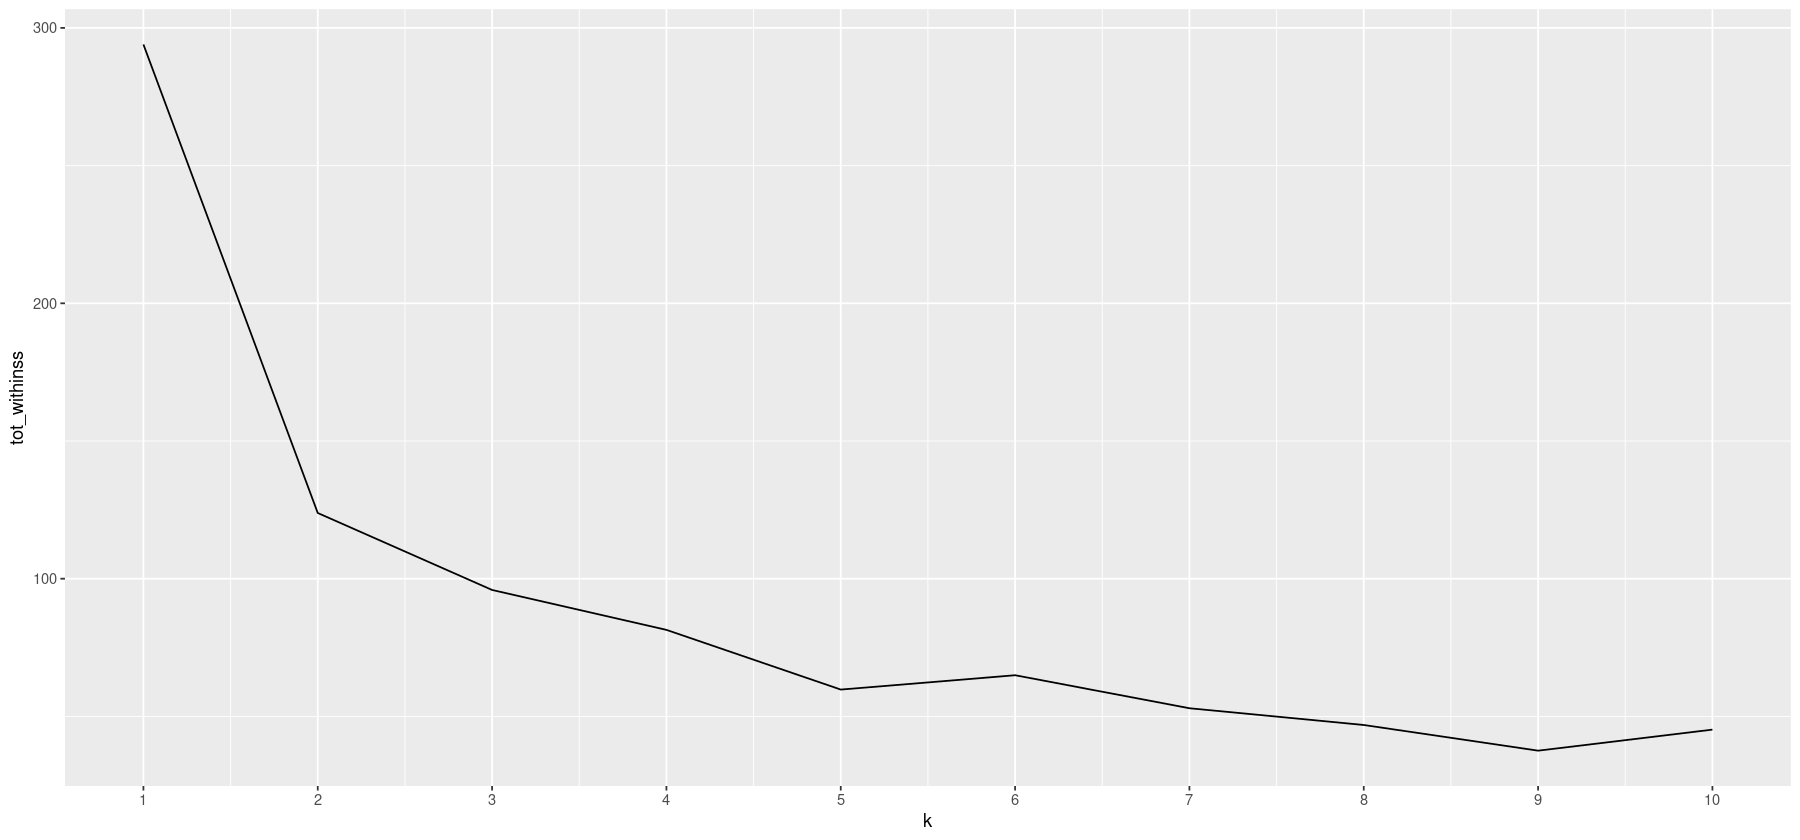

In [13]:
# Change the width of the plots by default to better visualize dendrogram
options(repr.plot.width = 15)

#  Adjust plot margins: c(bottom, left, top, right)
par(mar = c(10, 0, 0, 0))  # Increase the bottom margin

# Load the data and create a new column and rownames
players <- read_csv(paste0("nba_players_2023.csv")) %>% 
  mutate(pra_per_game = points_per_game + assists_per_game +
           rebounds_per_game) %>% 
  column_to_rownames("name")

# Normalize or scale  data
players_scaled <- scale(players)

# Create function to calculate total within-cluster sum of squares
tot_withinss <- map_dbl(1:10, function(k){
  model <- kmeans(x = players_scaled, centers = k)
  model$tot.withinss
})

# Design a data frame to hold the total within-cluster sum of squares
elbow_df <- data.frame(
  k = 1:10,
  tot_withinss = tot_withinss
)

# Make a plot of the total within-cluster sum of squares
ggplot(elbow_df, aes(x = k, y = tot_withinss)) +
  geom_line() +
  scale_x_continuous(breaks = 1:10)

# Look for the 'elbow' in the plot to decide on the optimal number of clusters
# In this case, it looks like 2 clusters is a good choice
num_clusters <- 2

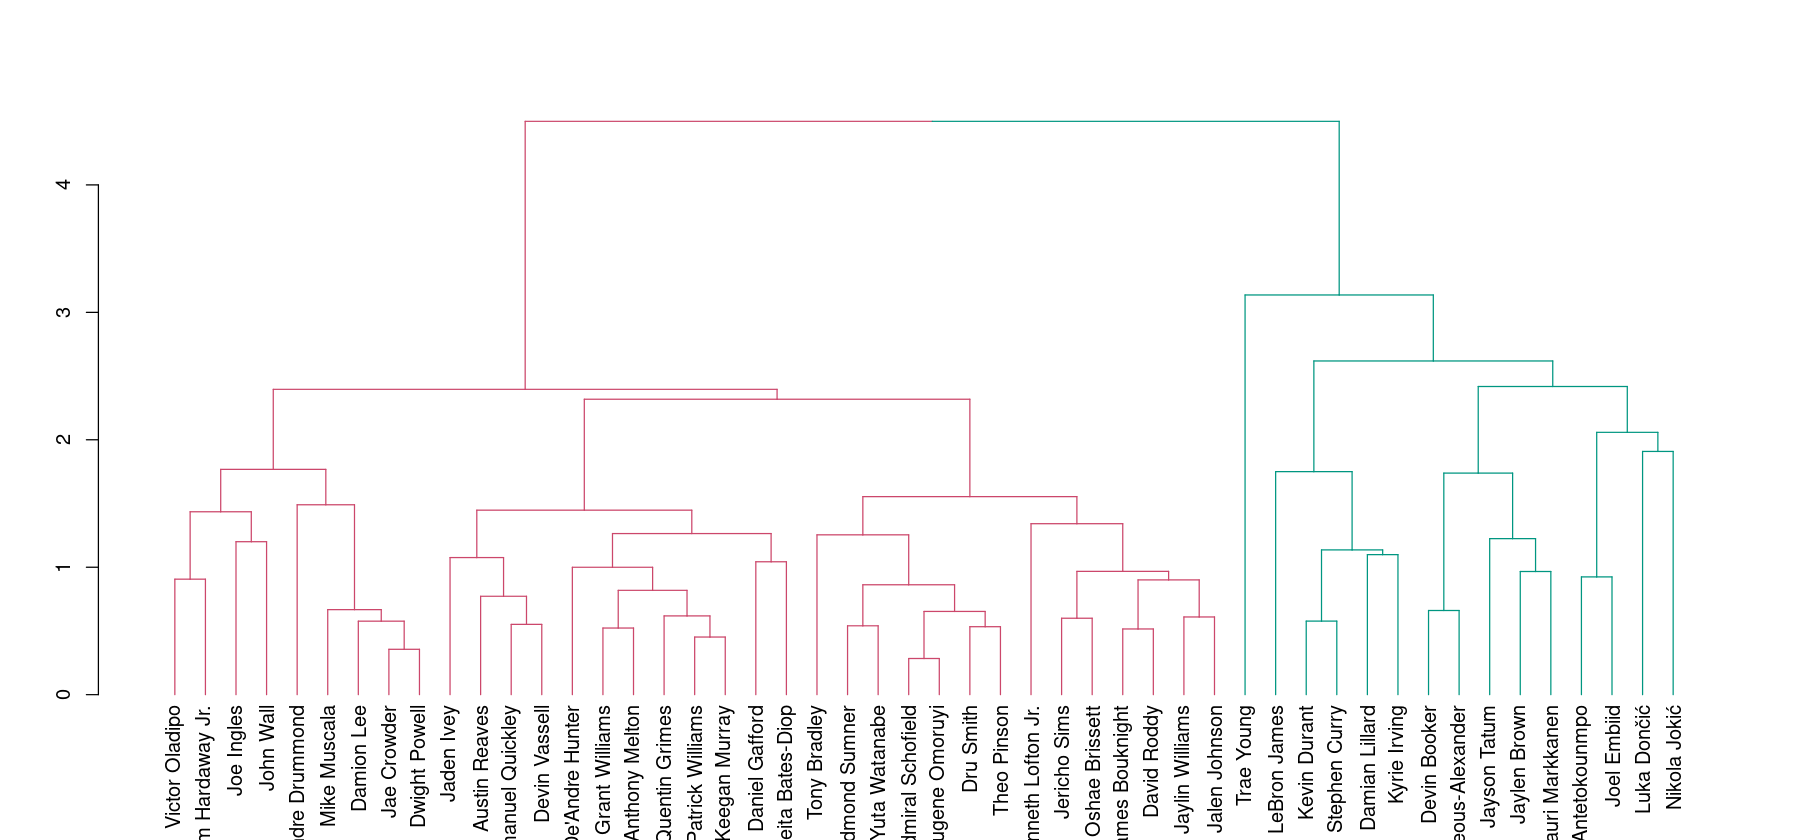

In [14]:
# Compute distances and perform hierarchical clustering
dist_players <- dist(players_scaled, method = 'euclidean')
hc_players <- hclust(dist_players, method = 'average')

# Create and visualize dendrogram with colored branches
dend_colored <- color_branches(as.dendrogram(hc_players), 
                               k = num_clusters)
plot(dend_colored)

# Assign clusters to players and prepare data for analysis
# Decided by looking at the dendrogram
cut_players <- cutree(hc_players, h = 3.5)
clust_players <- mutate(players, cluster = cut_players)


In [15]:

# By age
clust_players %>% 
  group_by(factor(cluster)) %>% 
  summarize(mean = mean(age), 
            sd = sd(age), 
            median = median(age), 
            min = min(age), 
            max = max(age))

# By minutes played per game
clust_players %>% 
  group_by(factor(cluster)) %>% 
  summarize(mean = mean(minutes_played_per_game), 
            sd = sd(minutes_played_per_game), 
            median = median(minutes_played_per_game), 
            min = min(minutes_played_per_game), 
            max = max(minutes_played_per_game))

# By rebounds per game
clust_players %>% 
  group_by(factor(cluster)) %>% 
  summarize(mean = mean(rebounds_per_game), 
            sd = sd(rebounds_per_game), 
            median = median(rebounds_per_game), 
            min = min(rebounds_per_game), 
            max = max(rebounds_per_game))

# By assists per game
clust_players %>% 
  group_by(factor(cluster)) %>% 
  summarize(mean = mean(assists_per_game), 
            sd = sd(assists_per_game), 
            median = median(assists_per_game), 
            min = min(assists_per_game), 
            max = max(assists_per_game))

# By points per game
clust_players %>% 
  group_by(factor(cluster)) %>% 
  summarize(mean = mean(points_per_game), 
            sd = sd(points_per_game), 
            median = median(points_per_game), 
            min = min(points_per_game), 
            max = max(points_per_game))

# By points, rebounds, and assists per game
clust_players %>% 
  group_by(factor(cluster)) %>% 
  summarize(mean = mean(pra_per_game), 
            sd = sd(pra_per_game), 
            median = median(pra_per_game), 
            min = min(pra_per_game), 
            max = max(pra_per_game))


factor(cluster),mean,sd,median,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,25.48571,3.995375,25,20,35
2,28.20000,4.491261,27,23,38


factor(cluster),mean,sd,median,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20.08571,7.913434,19.2,2.8,31.7
2,35.21333,1.320101,35.5,32.1,37.4


factor(cluster),mean,sd,median,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.357143,1.243639,3.4,0.9,6.6
2,7.333333,2.687980,6.9,3.0,11.8


factor(cluster),mean,sd,median,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.728571,1.273617,1.3,0.1,5.2
2,5.986667,2.213551,5.5,1.9,10.2


factor(cluster),mean,sd,median,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8.385714,4.167814,6.9,1.6,18.5
2,29.033333,2.680796,29.1,24.5,33.1


factor(cluster),mean,sd,median,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13.47143,5.642933,12.5,2.6,26
2,42.35333,4.255730,41.8,36.1,49


In [19]:

# Identify most influential statistics for clustering

strongest_influence <- c(
  "minutes_played_per_game", 
  "points_per_game", 
  "pra_per_game"
)
print(strongest_influence)

[1] "minutes_played_per_game" "points_per_game"        
[3] "pra_per_game"           


copuld you make a code to show the resutls of the project

Let's visualize the results of the clustering project. We will use the `clust_players` dataset to create a scatter plot of the players, colored by their assigned cluster. We'll focus on the most influential statistics identified earlier: `minutes_played_per_game`, `points_per_game`, and `pra_per_game`.

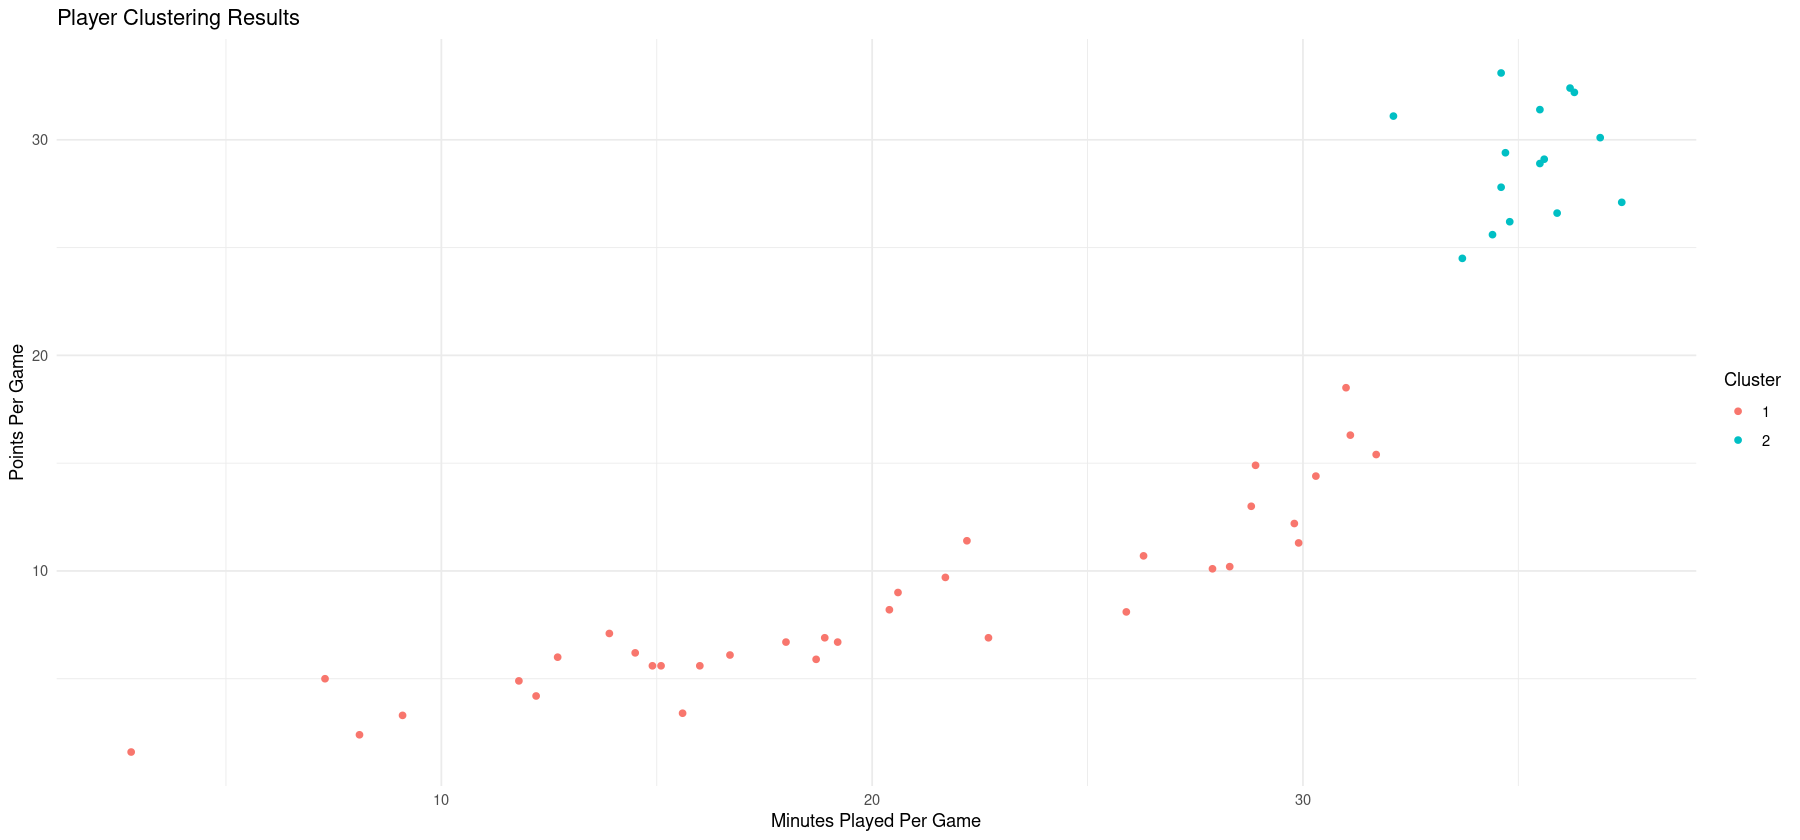

In [17]:
library(ggplot2)

# Scatter plot of players colored by cluster
plot <- ggplot(clust_players, aes(x = minutes_played_per_game, y = points_per_game, color = as.factor(cluster))) +
  geom_point() +
  labs(title = "Player Clustering Results",
       x = "Minutes Played Per Game",
       y = "Points Per Game",
       color = "Cluster") +
  theme_minimal()

print(plot)

The plot above shows the clustering of players based on their `minutes_played_per_game` and `points_per_game`. Each color represents a different cluster, allowing us to visually assess the separation and grouping of players according to these metrics.